In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import pickle
import seaborn as sns
import tensorflow as tf

In [2]:
#importing the data
data_file = pd.read_csv("C:\\Users\\dell\\Desktop\\ADANIENTNS.csv")

In [3]:
#Checking the data
data_file.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,115.083138,119.496841,115.083138,118.379791,116.667130,13340428
1,2018-02-14,119.060921,121.785423,118.107338,119.578575,117.848579,12691224
2,2018-02-15,120.477661,121.322258,114.783440,117.017540,115.324593,9129656
3,2018-02-16,117.589684,119.033676,111.595772,113.230476,111.592316,10018309
4,2018-02-19,111.704750,113.039757,109.252693,110.560455,108.960930,8936687


In [4]:
#understanding the data
data_file.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,965.759690,983.825570,945.414674,965.176069,964.225123,6.642477e+06
std,1117.636842,1134.035374,1096.252517,1115.259350,1115.613560,8.687182e+06
min,67.113579,69.263008,64.707497,67.402306,66.427162,2.482490e+05
25%,143.000000,146.974998,140.337505,143.124996,142.032997,2.294392e+06
50%,252.250000,256.625000,249.949997,253.250000,251.137329,4.052000e+06
75%,1622.650025,1660.112488,1587.100037,1621.450012,1620.491760,7.129097e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4165.299805,8.885864e+07


In [5]:
data_file.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

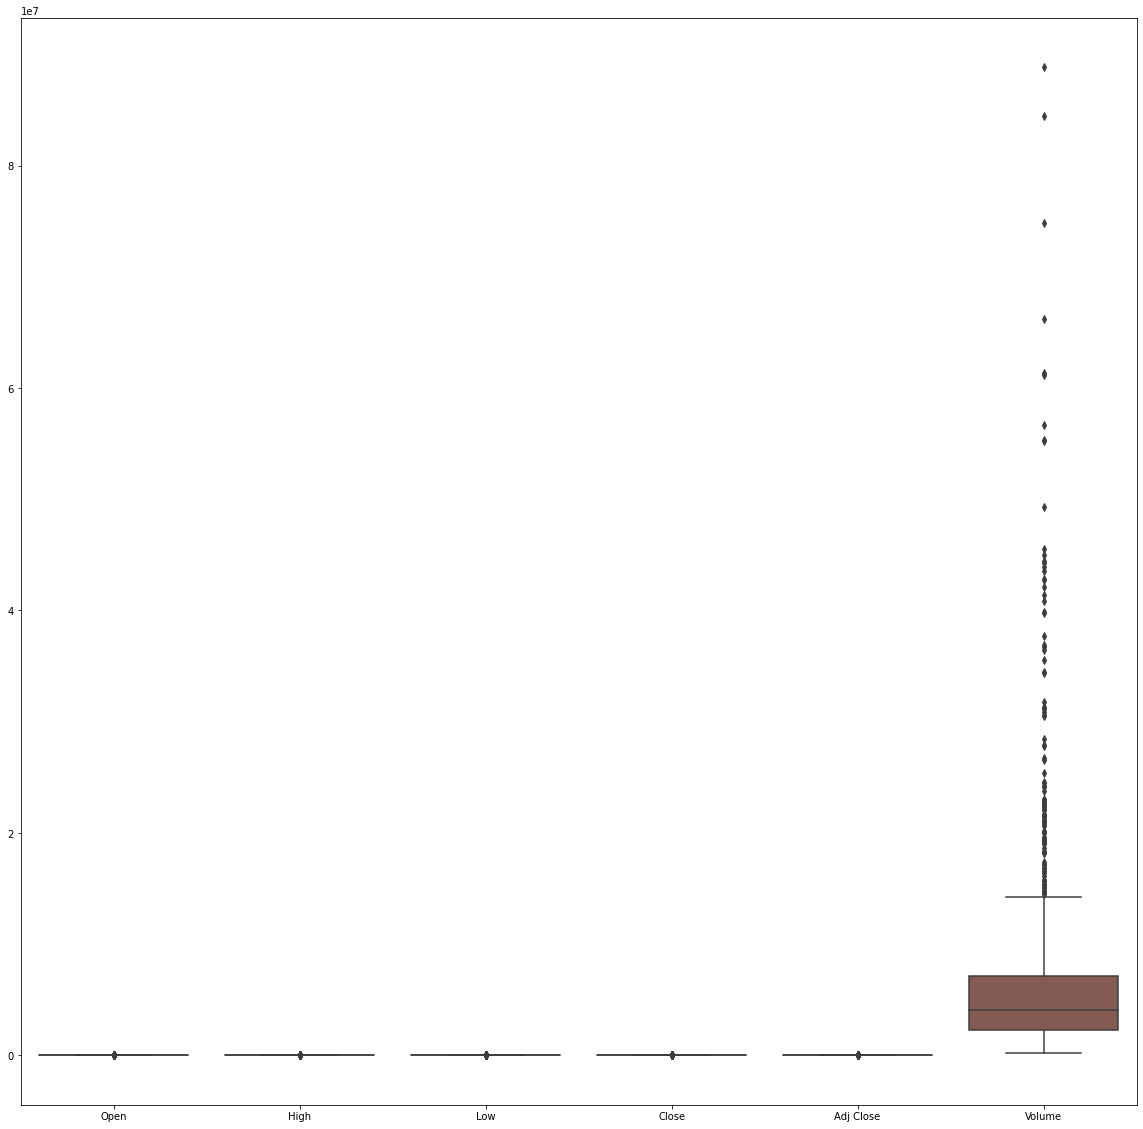

In [6]:
%matplotlib inline
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=data_file, ax=ax)


# there are so many outlieres in volume, will remove them

In [7]:
new_data_file = data_file[data_file['Volume'] < data_file['Volume'].quantile(q=0.75)]

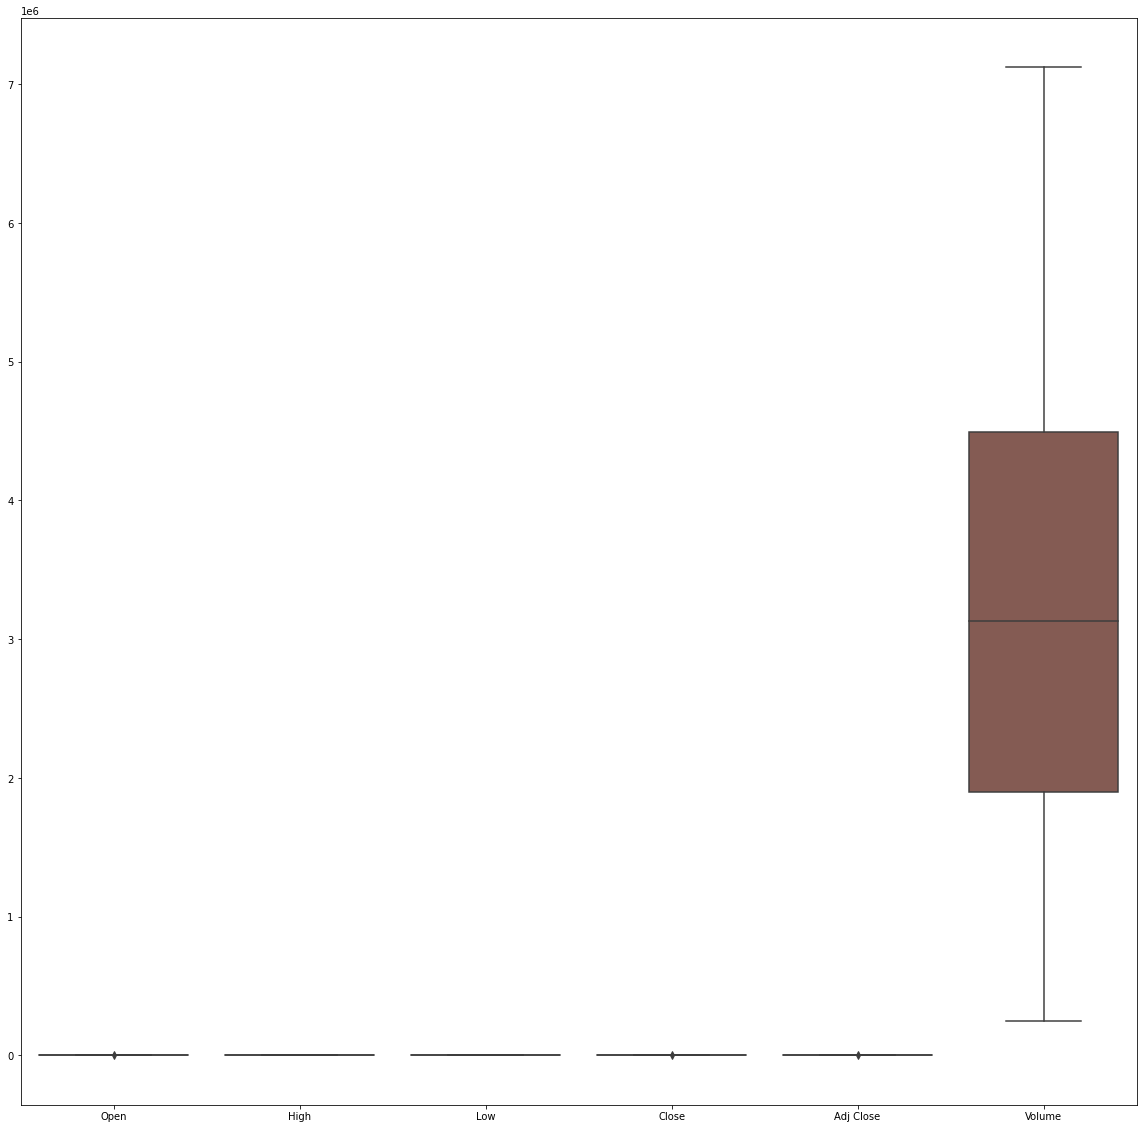

In [8]:
%matplotlib inline
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=new_data_file, ax=ax)


In [9]:
new_data_file['Date'] = pd.to_datetime(new_data_file['Date'])

<ipython-input-9-546791d1e98d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_file['Date'] = pd.to_datetime(new_data_file['Date'])


In [10]:
new_data_file.set_index('Date',inplace = True)


In [11]:
#dividing the training and test data
X_data = new_data_file.drop('Close', axis=1)
Y_data = new_data_file['Close']

In [12]:
X_data.describe()

,Open,High,Low,Adj Close,Volume
count,927.000000,927.000000,927.000000,927.000000,9.270000e+02
mean,1133.918708,1151.557705,1114.880484,1133.007711,3.325535e+06
std,1191.948484,1208.651896,1173.453329,1193.066144,1.667494e+06
min,69.327171,69.327171,67.081497,66.964645,2.482490e+05
25%,151.900002,154.599998,148.474998,150.132462,1.898094e+06
50%,447.250000,452.250000,438.049988,445.464844,3.129269e+06
75%,1753.000000,1771.849976,1723.224976,1750.680786,4.496028e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,7.124786e+06


In [13]:
Y_data.describe()

count     927.000000
mean     1133.872482
std      1192.705098
min        67.947685
25%       151.425003
50%       445.950012
75%      1751.424988
max      4165.299805
Name: Close, dtype: float64

In [14]:
# We can observe that data is not standerdised, so transforming the data for training and test data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

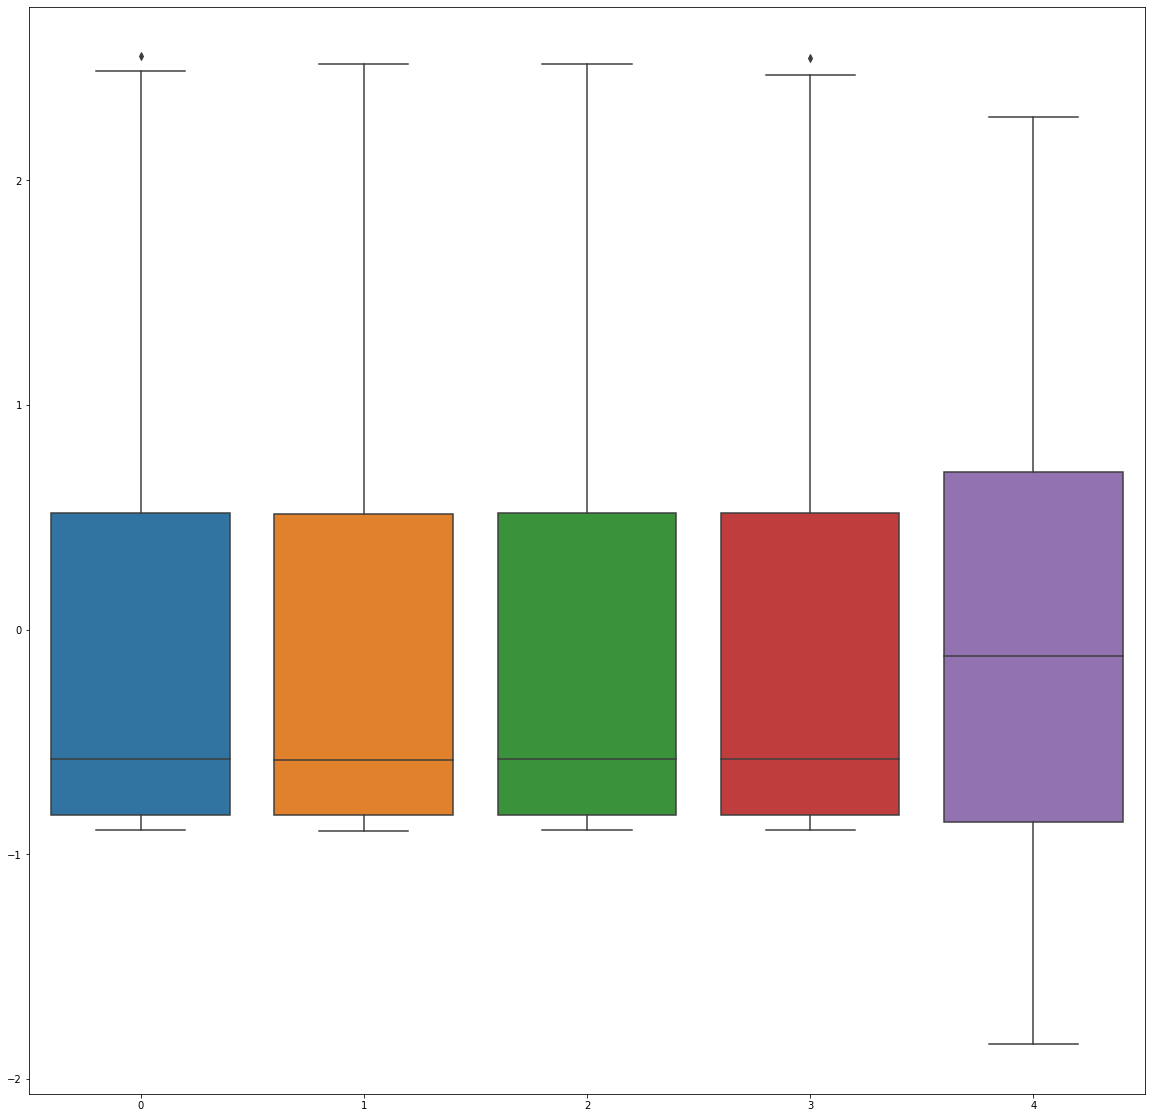

In [15]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=X_scaled,ax=ax)

In [16]:
X_train ,X_test, y_train, y_test = train_test_split(X_scaled,Y_data,test_size=20, random_state = 0)

In [17]:
# Creating the model with ADAM optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
29/29 [==============================] - 3s 62ms/step - loss: 3004108.7083 - val_loss: 1743214.7500
Epoch 2/500
29/29 [==============================] - 0s 3ms/step - loss: 2738924.8083 - val_loss: 1728140.7500
Epoch 3/500
29/29 [==============================] - 0s 5ms/step - loss: 2556906.0250 - val_loss: 1691969.3750
Epoch 4/500
29/29 [==============================] - 0s 5ms/step - loss: 2496818.7333 - val_loss: 1621804.8750
Epoch 5/500
29/29 [==============================] - 0s 4ms/step - loss: 2330767.5542 - val_loss: 1506102.2500
Epoch 6/500
29/29 [==============================] - 0s 5ms/step - loss: 2322120.0167 - val_loss: 1340984.0000
Epoch 7/500
29/29 [==============================] - 0s 4ms/step - loss: 2034914.5125 - val_loss: 1129888.7500
Epoch 8/500
29/29 [==============================] - 0s 2ms/step - loss: 1653629.2000 - val_loss: 882466.1875
Epoch 9/500
29/29 [==============================] - 0s 4ms/step - loss: 1357790.9000 - val_loss: 624391.3750
Ep

In [19]:
from sklearn.linear_model import LinearRegression
logi = LinearRegression()
logi.fit(X_train,y_train)
pred = logi.predict(X_test)

In [20]:
mean_absolute_error = tf.keras.losses.mean_absolute_error(y_test, pred)
mean_absolute_error = mean_absolute_error.numpy().mean().item()
print(f'your mean absolute error is :{mean_absolute_error:.2f}')

your mean absolute error is :0.46


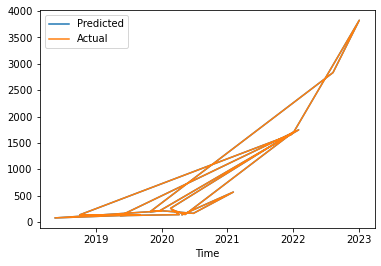

In [21]:
# Plot the predicted and actual values
plt.plot(y_test.index, pred, label='Predicted'),
plt.plot(y_test.index, y_test, label='Actual'),
plt.xlabel('Time'),
plt.legend(),
plt.show()